In [ ]:
# https://www.kaggle.com/datasets/shrutisaxena/food-nutrition-dataset

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [ ]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [ ]:
df = pd.read_csv("data/Tabular Data/food.csv")
df = df.dropna()
df.head()

In [ ]:
Category_list = ['BEEF', 'PORK', 'LAMB', 'BABYFOOD', 'SOUP', 'CHICKEN', 'TURKEY', 'VEAL', 'CANDIES', 'ALCOHOLIC BEV']
df = df[df['Category'].isin(Category_list)]
df.head()

In [ ]:
# Remove columns that do not contain numbers
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_with_numeric_columns = df[numeric_columns]
x = df_with_numeric_columns
x.head()

In [ ]:
categories = df["Category"].tolist()

In [ ]:
set(categories)

In [ ]:
import umap

scaled_x = StandardScaler().fit_transform(x)
reducer = umap.UMAP()
embedding = reducer.fit_transform(x)
embedding.shape

In [ ]:
def string_to_int_mapping(strings):
    # Create a dictionary to store string to integer mapping
    string_to_int = {}
    int_sequence = []

    # Assign a unique integer to each unique string
    for string in strings:
        if string not in string_to_int:
            string_to_int[string] = len(string_to_int)  # Assign the next available integer
        # Append the corresponding integer to the sequence
        int_sequence.append(string_to_int[string])

    return int_sequence, string_to_int

# Example usage:
strings = ["apple", "banana", "apple", "orange", "banana"]
int_sequence, string_to_int = string_to_int_mapping(strings)
print("String to integer sequence:", int_sequence)
print("String to integer mapping:", string_to_int)

In [ ]:
categories_converted,_ = string_to_int_mapping(categories)

In [ ]:
# Dimensionality reduction 1: tSNE

import time
from sklearn.manifold import TSNE

scaled_x = StandardScaler().fit_transform(x)

#n_sne = 7000

time_start = time.time()
#tsne = TSNE(n_iter=300)
#tsne = TSNE(n_components=2, n_iter = 2000, perplexity=40)
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(scaled_x)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

import matplotlib.pyplot as plt
%matplotlib inline
# Create the figure
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE' )
# Create the scatter
ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=categories_converted, 
    cmap=plt.cm.get_cmap('Paired'), 
    alpha=1.0)
plt.show()

In [ ]:
print(tsne_results)

In [ ]:
df = pd.DataFrame(tsne_results, columns=['x', 'y'])
df["category"] = categories

df.to_csv("FoodData_Projected.csv", index=False)

In [ ]:
max(df["y"].tolist())

### Decoding Food

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [3]:
df = pd.read_csv("data/decodingfood_tensor.csv")
df = df.dropna()
df.head()

,BBS SAP-No (Art.-Nr.),Energy1,Energy2,Fat,Saturated Fat,MUFA,PUFA,Omega,Carbohydrates,Sugar,...,Certificate|Certificate|Place of Production|PK,Certificate|Certificate|Place of Production|UA,Certificate|Certificate|Place of Production|MD,Certificate|Certificate|Place of Production|UY,Certificate|Certificate|Place of Production|CI,Certificate|Certificate|Place of Production|US,Certificate|Certificate|Place of Production|CA,Certificate|Certificate|Place of Production|CO,Certificate|Certificate|Place of Production|AU,Product Quality caracteristics|Total Plate Count (max)
0,10002,575.0,2405.80,49.42,3.73,30.89,12.07,0.0,21.67,3.89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10004,575.0,2405.80,49.42,3.73,30.89,12.07,0.0,21.67,3.89,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,400.0
2,10006,575.0,2403.50,49.42,3.73,0.00,42.96,0.4,21.67,3.89,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5000.0
3,10014,320.0,1312.00,0.60,0.10,0.00,0.00,0.0,76.61,53.18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10015,332.0,1387.76,0.50,0.10,0.00,0.00,0.0,87.00,65.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
category_columns = ['Fruit', 'Seeds', 'Botanical', 'Nut']
df_4groups = df[(df[category_columns] == 1).any(axis=1)]
df_4groups.head()

,BBS SAP-No (Art.-Nr.),Energy1,Energy2,Fat,Saturated Fat,MUFA,PUFA,Omega,Carbohydrates,Sugar,...,Certificate|Certificate|Place of Production|PK,Certificate|Certificate|Place of Production|UA,Certificate|Certificate|Place of Production|MD,Certificate|Certificate|Place of Production|UY,Certificate|Certificate|Place of Production|CI,Certificate|Certificate|Place of Production|US,Certificate|Certificate|Place of Production|CA,Certificate|Certificate|Place of Production|CO,Certificate|Certificate|Place of Production|AU,Product Quality caracteristics|Total Plate Count (max)
1,10004,575.0,2405.80,49.42,3.73,30.89,12.07,0.0,21.67,3.89,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,400.0
2,10006,575.0,2403.50,49.42,3.73,0.00,42.96,0.4,21.67,3.89,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5000.0
3,10014,320.0,1312.00,0.60,0.10,0.00,0.00,0.0,76.61,53.18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,10016,369.0,1542.42,2.00,1.00,0.00,0.10,0.0,92.00,80.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,10021,62.0,264.00,0.09,0.04,0.00,0.00,0.0,14.00,14.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
ArtNo = df_4groups["BBS SAP-No (Art.-Nr.)"].tolist()

In [6]:
df_4groups_big8 = df_4groups[["Energy1", "Fat", "Saturated Fat", "MUFA", "PUFA", "Omega", "Carbohydrates", "Sugar", "Fruit", "Seeds", "Botanical", "Nut"]]
df_4groups_big8.head()

,Energy1,Fat,Saturated Fat,MUFA,PUFA,Omega,Carbohydrates,Sugar,Fruit,Seeds,Botanical,Nut
1,575.0,49.42,3.73,30.89,12.07,0.0,21.67,3.89,0.0,0.0,0.0,1.0
2,575.0,49.42,3.73,0.00,42.96,0.4,21.67,3.89,0.0,0.0,0.0,1.0
3,320.0,0.60,0.10,0.00,0.00,0.0,76.61,53.18,1.0,0.0,0.0,0.0
5,369.0,2.00,1.00,0.00,0.10,0.0,92.00,80.00,1.0,0.0,0.0,0.0
6,62.0,0.09,0.04,0.00,0.00,0.0,14.00,14.00,1.0,0.0,0.0,0.0


In [7]:
# Remove columns that do not contain numbers
df_4groups_big8_numeric = df_4groups[["Energy1", "Fat", "Saturated Fat", "MUFA", "PUFA", "Omega", "Carbohydrates", "Sugar"]]
df_4groups_big8_numeric

,Energy1,Fat,Saturated Fat,MUFA,PUFA,Omega,Carbohydrates,Sugar
1,575.0,49.42,3.73,30.890,12.070,0.00,21.67,3.89
2,575.0,49.42,3.73,0.000,42.960,0.40,21.67,3.89
3,320.0,0.60,0.10,0.000,0.000,0.00,76.61,53.18
5,369.0,2.00,1.00,0.000,0.100,0.00,92.00,80.00
6,62.0,0.09,0.04,0.000,0.000,0.00,14.00,14.00
...,...,...,...,...,...,...,...,...
1312,0.0,0.00,0.00,0.000,0.000,0.00,0.00,0.00
1485,322.0,0.50,0.10,0.035,0.016,0.02,74.00,59.00
1551,0.0,0.00,0.00,0.039,0.107,0.00,0.00,0.00
1651,0.0,0.00,0.00,0.132,0.044,0.00,0.00,0.00


In [8]:
category_list = df_4groups_big8[category_columns].idxmax(axis=1).tolist()

In [9]:
def string_to_int_mapping(strings):
    # Create a dictionary to store string to integer mapping
    string_to_int = {}
    int_sequence = []

    # Assign a unique integer to each unique string
    for string in strings:
        if string not in string_to_int:
            string_to_int[string] = len(string_to_int)  # Assign the next available integer
        # Append the corresponding integer to the sequence
        int_sequence.append(string_to_int[string])

    return int_sequence, string_to_int

In [10]:
categories_converted,_ = string_to_int_mapping(category_list)

t-SNE done! Time elapsed: 0.3644225597381592 seconds


C:\Users\adria\AppData\Local\Temp\ipykernel_12196\1518906798.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Paired'),


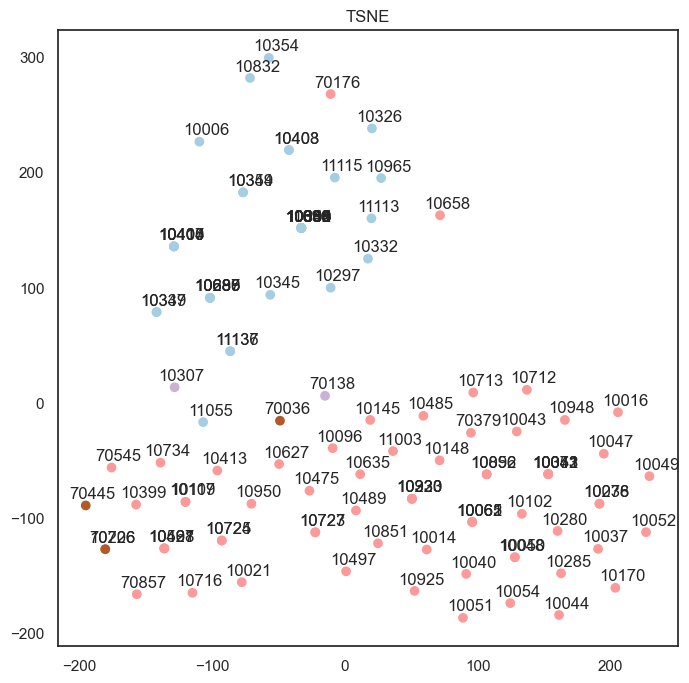

In [11]:
import time
from sklearn.manifold import TSNE

X= StandardScaler().fit_transform(df_4groups_big8_numeric)

#n_sne = 7000

time_start = time.time()
#tsne = TSNE(n_iter=300)
#tsne = TSNE(n_components=2, n_iter = 2000, perplexity=40)
tsne = TSNE(n_components=2, perplexity=50)
tsne_results = tsne.fit_transform(X)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

import matplotlib.pyplot as plt
%matplotlib inline
# Create the figure
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE' )
# Create the scatter
ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=categories_converted, 
    cmap=plt.cm.get_cmap('Paired'), 
    alpha=1.0)

for i in range(len(X)):
    plt.annotate(ArtNo[i], (tsne_results[:,0][i], tsne_results[:,1][i]), textcoords="offset points", xytext=(5,5), ha='center')

plt.show()

## Add metrics

In [12]:
from get_all_metrics import tnc_measure, tnc_measure, mrre_measure, nbh_measure

ModuleNotFoundError: No module named 'gensim'

In [16]:
metrics = pd.DataFrame()

metrics["Trustworthiness"] = tnc_measure(X, tsne_results, k=7, return_local=True)[1]['local_trustworthiness']
metrics["Continuity"] = tnc_measure(X, tsne_results, k=7, return_local=True)[1]['local_continuity']
metrics["MRRE_False"] = mrre_measure(X, tsne_results, k=7, return_local=True)[1]['local_mrre_false']
metrics["MRRE_Missing"] = mrre_measure(X, tsne_results, k=7, return_local=True)[1]['local_mrre_missing']
metrics["Neighborhood_Hit"] = nbh_measure(tsne_results, category_list, k=7, return_local=True)[1]["local_neighborhood_hit"]
metrics["accuracy"] = metrics[["Trustworthiness", "Continuity", "MRRE_False", "MRRE_Missing"]].mean(axis=1)

metrics.head()

,Trustworthiness,Continuity,MRRE_False,MRRE_Missing,Neighborhood_Hit,accuracy
0,0.994286,0.998571,0.979765,0.988810,1.0,0.990358
1,0.865714,0.842857,0.835651,0.770872,1.0,0.828774
2,0.895714,0.941429,0.859115,0.871477,1.0,0.891934
3,0.951429,0.904286,0.938762,0.891022,1.0,0.921375
4,0.972857,0.951429,0.956964,0.886801,1.0,0.942013


# Save dataframe

In [20]:
# get names of other decoding food dataset
df2 = pd.read_csv("data/DecodingFood-Ingredients_comma.csv")
df2 = df2[["BBS SAP-No (Art.-Nr.)", "Name"]]

In [21]:
df_output = df_4groups[["BBS SAP-No (Art.-Nr.)", "Energy1", "Fat", "Saturated Fat", "MUFA", "PUFA", "Omega", "Carbohydrates", "Sugar"]]
df_output["category"] = category_list

C:\Users\adria\AppData\Local\Temp\ipykernel_12196\4003512220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output["category"] = category_list


In [22]:
# add name
df_output = df_output.merge(df2, on="BBS SAP-No (Art.-Nr.)")
# add x and y
df_output[["x", "y"]] = tsne_results
# add metrics
df_output = pd.concat([df_output, metrics], axis=1)

df_output.head()

,BBS SAP-No (Art.-Nr.),Energy1,Fat,Saturated Fat,MUFA,PUFA,Omega,Carbohydrates,Sugar,category,Name,x,y,Trustworthiness,Continuity,MRRE_False,MRRE_Missing,Neighborhood_Hit,accuracy
0,10004,575.0,49.42,3.73,30.89,12.07,0.0,21.67,3.89,Nut,Californian Almonds Nonpareil Extra No. 1 20/2...,-32.943226,151.870468,0.994286,0.998571,0.979765,0.988810,1.0,0.990358
1,10006,575.0,49.42,3.73,0.00,42.96,0.4,21.67,3.89,Nut,Californian Almonds Natural Sliced Thick EU,-109.716743,226.718369,0.865714,0.842857,0.835651,0.770872,1.0,0.828774
2,10014,320.0,0.60,0.10,0.00,0.00,0.0,76.61,53.18,Fruit,EC Dried Pineapple Dices,61.544144,-127.152344,0.895714,0.941429,0.859115,0.871477,1.0,0.891934
3,10016,369.0,2.00,1.00,0.00,0.10,0.0,92.00,80.00,Fruit,Apple Dehydrated Dices With Red Skin Without S...,205.616547,-8.070051,0.951429,0.904286,0.938762,0.891022,1.0,0.921375
4,10021,62.0,0.09,0.04,0.00,0.00,0.0,14.00,14.00,Fruit,"Apricots Halves Choice In Syrup, A10 Tin",-77.752541,-155.531158,0.972857,0.951429,0.956964,0.886801,1.0,0.942013


In [24]:
# write to csv
df_output.drop(columns="BBS SAP-No (Art.-Nr.)").to_csv("data/DecodingFood.csv", index=False)